# Homework 6 #
### Robin James ###

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.interpolate as interp
import  scipy.optimize as opt
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
rng= np.random.default_rng()


## Problem 1 ##
### Part i ###
For Projectile motion with air resistance, there are two forces, gravity and drag:
\begin{align}
 \vec{F_{net}} &= \vec{F_g} - \vec{f_d} \\
 \vec{F_{net}} &= m\vec{g} - b\vec{v}
\end{align}
When the object hits terminal velocity, $\vec{F_{net}}=0$
\begin{align}

 0 &= m\vec{g} - b\vec{v_t} \\
 m\vec{g} &= b\vec{v_t} \\
\vec{v_t} &= \frac{m\vec{g}}{b}  \\
\end{align}

### Part ii ###
As shown in the part above, the equation of motion is
$$  \vec{F_{net}} = m\vec{g} - b\vec{v} $$
In different form:
$$  \vec{r''} = m\vec{g} - b\vec{r'} $$

In component form
$$  \ddot{x} = 0 - b \dot{x} $$
$$  \ddot{y} = -mg - b\dot{y} $$
And then as a system

\begin{align}
    \dot{x} &=v_x \\
    \dot{v_x} &= \frac{-gv_x}{v_t}\\
     \\
     \\
    \dot{y}&=v_y \\
    \dot{v_y}&=-g(1+ \frac{v_y}{v_t}) \\





\end{align}

### Part iii ###
Solve x system first:
$$ \Large \frac{\mathrm{d}v}{\mathrm{d}t} = \frac{-gv_x}{v_t} $$
$$ \Large \int \frac{\mathrm{d}v}{v_x\mathrm{d}t} = \int \frac{-g}{v_t} \mathrm{d}t$$
$$ \Large ln|v_x|-ln|v_{x0}| = \frac{-g}{v_t} t $$
$$ \Large v_x(t)=v_{x0}e^{\frac{-g}{v_t}t} $$
$$ \Large \int v_x(t) dt =\int  v_{x0}e^{\frac{-g}{v_t}t} dt$$
$$ \Large x(t) = \frac{v_tv_0\cos\theta}{g}(1-e^{\frac{-g}{v_t}t}) $$

Then solve y system:

$$ \Large \int \frac{\mathrm{d}v}{\mathrm{d}t} =\int -g(1+ \frac{v_y}{v_t}) $$

$$ \Large \ln(\frac{v_t+v_y}{v_t+v_{y_0}}) = - \frac{g}{v_t}t$$


$$ \Large v_y(t) = v_0\,\sin\theta\,{\rm e}^{\frac{-gt}{v_t}} - v_t(1-e^{\frac{-gt}{v_t}}) $$
$$ \Large \int v_y(t) = \int v_0\,\sin\theta\,{\rm e}^{\frac{-gt}{v_t}} - v_t(1-e^{\frac{-gt}{v_t}}) $$
$$ \Large y(t) = \frac{v_t}{g}\,\left(v_0\,\sin\theta + v_t\right)\left(1-{\rm e}^{\frac{-gt}{v_t}}\right) . $$


### Part iv ###
Let $ s = \frac{gt}{v_t} $, $ X(s)=\frac{g}{v_t^2}x(t)$, and $ Y(s)=\frac{g}{v_t^2}y(t)$

$$\large
 X(s) = \frac{g}{v_t^2} \frac{v_t^2\cos\theta}{g}(1-e^{-s}) $$
 $$\large
 X(s) =  \cos\theta(1-e^{-s}) $$
$$ \large Y(s) =\frac{g}{v_t^2} \frac{v_t}{g}\,\left(v_t\,\sin\theta + v_t\right)\left(1-{\rm e}^{\frac{-gt}{v_t}}\right) $$
$$ \large Y(s) = \,\left(\,\sin\theta + 1\right)\left(1-{\rm e}^{-s}\right) $$



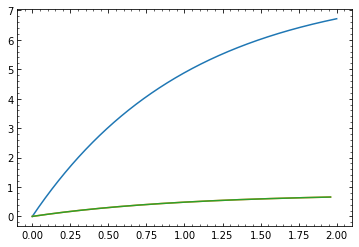

In [36]:
def xs(t,angle):
    return np.cos(np.deg2rad(angle))*(1-np.exp(-t))
def ys(t,angle):
    return (np.sin(np.deg2rad(angle))+1)*(1-np.exp(-t))

def xt(t,angle,vt,g=9.8):

    return vt**2*np.cos(np.deg2rad(angle))/g *(1-np.exp(-g*t/vt))
def yt(t,angle,vt,g=9.8):

    return vt/g *(vt*np.sin(np.deg2rad(angle))+vt)*(1-np.exp(-g*t/vt))-vt*t
arange = np.linspace(0,2,1000)

fig= plt.figure()
ax = fig.add_subplot(111)


ax.plot(arange,xt(arange,40,10))
ax.plot(9.8/10 *arange,xs(9.8/10 * arange,40))
ax.plot(9.8/10 *arange,(9.8/100)*xt(arange,40,10))
#ax.plot(arange,yt(arange,90,10))
#ax.plot(9.8/10 *arange,ys(9.8/10 * arange,90))